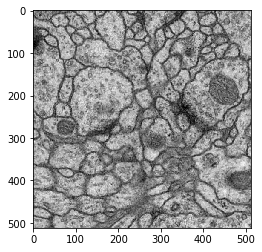

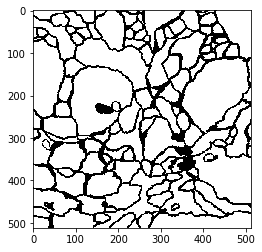

In [13]:
%matplotlib inline

from torch.utils.data import DataLoader, Dataset
import PIL
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from albumentations import Compose
from torchvision import transforms

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


neuron_target = './data/train-labels.tif'
neuron_train = './data/train-volume.tif'

im_stack_train = io.imread(neuron_train)
im_stack_test = io.imread(neuron_target)
plt.figure()
plt.imshow(im_stack_train[0], cmap='gray')
plt.figure()
plt.imshow(im_stack_test[0], cmap='gray')

# 1. Create a jupyter widget to explore the image stack (slide trough the stack) and  Visualize the train and target on one image (transparent mask) example:
![alt text](static/widget.png "Logo Title Text 1")


# 2. Implement NeuronSegmDataset  a class that implements the data-loading
# 3. Use albumentations as the augmenter

In [14]:

class NeuronSegmDataset(Dataset):
    def __init__(self, neuron_train_path, neuron_target_path, image_transform=None, augmenter=None):
        self.train = # load the image from tif
        self.target = # load the target file from tif
        self.image_transform = image_transform
        self.augmenter = augmenter

    def __len__(self):
        return # Length of the data (stack size)

    def __getitem__(self, ix):
        # ?
        # ?
        if self.augmenter:
            # ?
            # ?
        if self.image_transform is not None:
            # ? 
            # ?

        return X, y

    def _load_image(self, ix):
        # Load one slice from the stack as PIL.Image
        return 
    def _load_target(self, ix):
        # Load one slice from mask as PIL.Image
        return 

    def collate_func(self, batch):
        pass

    def do_augment(self, X, y):
        
        X = np.array(X)
        y = np.array(y)
        res = self.augmenter(image=X, mask=y)

        return PIL.Image.fromarray(res['image']), PIL.Image.fromarray(res['mask'])


SyntaxError: invalid syntax (<ipython-input-14-864f0e19e052>, line 4)

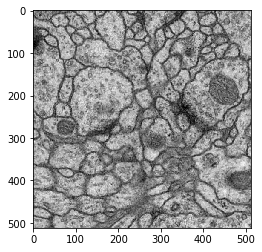

In [15]:
trans_train = transforms.Compose([transforms.Resize(192), 
                                  transforms.ToTensor()])
trans_test = transforms.Compose([transforms.Resize(192), 
                                 transforms.ToTensor()])

aug = Compose([RandomGamma(), 
               VerticalFlip(), 
               HorizontalFlip(),
               RandomRotate90(), 
               GridDistortion(),
               ElasticTransform(),
               OpticalDistortion(distort_limit=1, shift_limit=1)])




im_stack = io.imread(neuron_train)
plt.imshow(im_stack[0], cmap='gray')

# train_ds = NeuronSegmDataset(neuron_train, neuron_target, image_transform=trans_train, augmenter=aug)


In [16]:
# %load .solutions/8-ISBI-dataset-solutions.py

from torch.utils.data import DataLoader, Dataset
import PIL
from skimage import io
import numpy as np



class NeuronSegmDataset(Dataset):
    def __init__(self, neuron_train_path, neuron_target_path, image_transform=None, augmenter=None):
        self.target_image = io.imread(neuron_train_path)
        self.target = io.imread(neuron_target_path)
        self.image_transform = image_transform
        self.augmenter = augmenter
        

    def __len__(self):
        return self.target.shape[0]

    def __getitem__(self, ix):
        X = self._load_image(ix)
        y = self._load_target(ix)

        if self.augmenter:
            X, y = self.do_augment(X, y)
        if self.image_transform is not None:
            X = self.image_transform(X)
            y = self.image_transform(y)

        return X, y

    def _load_image(self, ix):
        return PIL.Image.fromarray(self.target_image[ix])

    def _load_target(self, ix):
        return PIL.Image.fromarray(self.target[ix])

    def collate_func(self, batch):
        pass

    def do_augment(self, X, y):
        X = np.array(X)
        y = np.array(y)
        res = self.augmenter(image=X, mask=y)

        return PIL.Image.fromarray(res['image']), PIL.Image.fromarray(res['mask'])

    
@interact
def show_images(x=(0, len(im_stack_train)-1), show_mask=True, alpha=(0,.9)):
    plt.imshow(im_stack_train[x], cmap='gray')
    if show_mask:
        plt.imshow(im_stack_test[x], cmap='jet', alpha=alpha)
        
        
# nds = NeuronSegmDataset(neuron_train, neuron_target, trans_train, aug)
# plt.imshow(nds[0][0][0].numpy(),cmap='gray')

interactive(children=(IntSlider(value=14, description='x', max=29), Checkbox(value=True, description='show_mask'), FloatSlider(value=0.45, description='alpha', max=0.9), Output()), _dom_classes=('widget-interact',))

In [17]:
nds = NeuronSegmDataset(neuron_train, neuron_target, trans_train, aug)


In [34]:
X_train, mask  = nds[10]


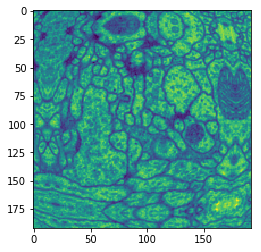

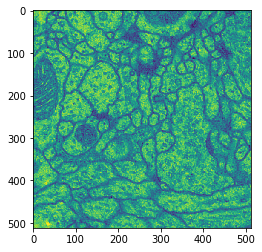

In [35]:
plt.figure()
plt.imshow(X_train.numpy()[0])
plt.figure()
plt.imshow(im_stack_train[10])